Sample of the Dataset:
         street         city  statezip country  bedrooms  bathrooms  \
0    Oak Street     New York     10001     USA         4          3   
1  Maple Street  Los Angeles     90001     USA         5          4   
2   Pine Street      Chicago     60601     USA         3          2   
3  Cedar Street      Houston     77001     USA         4          3   
4  Beech Street      Phoenix     85001     USA         5          4   

   sqft_living  sqft_lot  floors  waterfront  ... sqft_basement  yr_built  \
0         2000      5000       2           0  ...           500      2000   
1         2500      6000       3           1  ...           500      1990   
2         1800      4000       2           0  ...           600      1980   
3         2200      5500       2           1  ...           500      1995   
4         3000      7000       3           0  ...           500      2005   

   yr_renovated  year_built  month_built  feets_of_rooms  fans  cement  \
0            

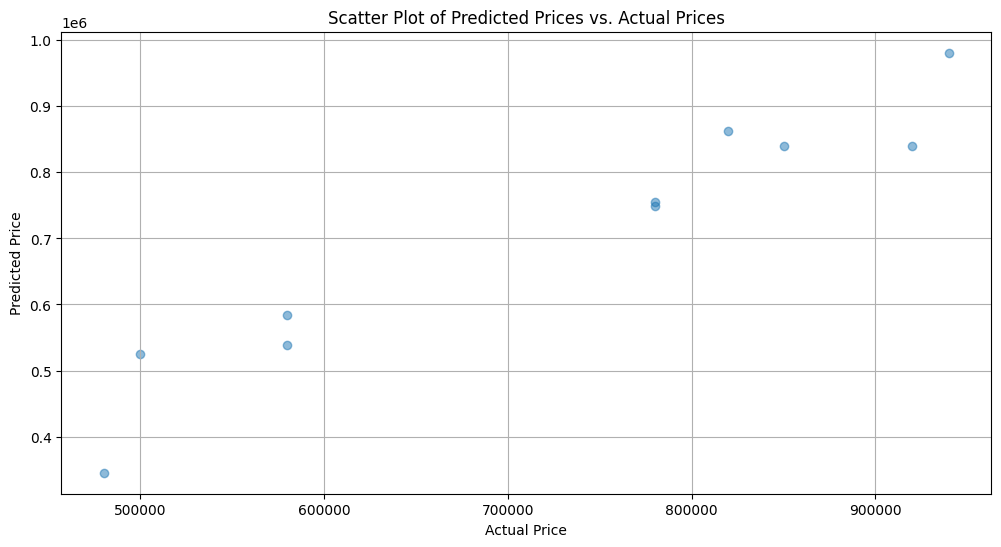

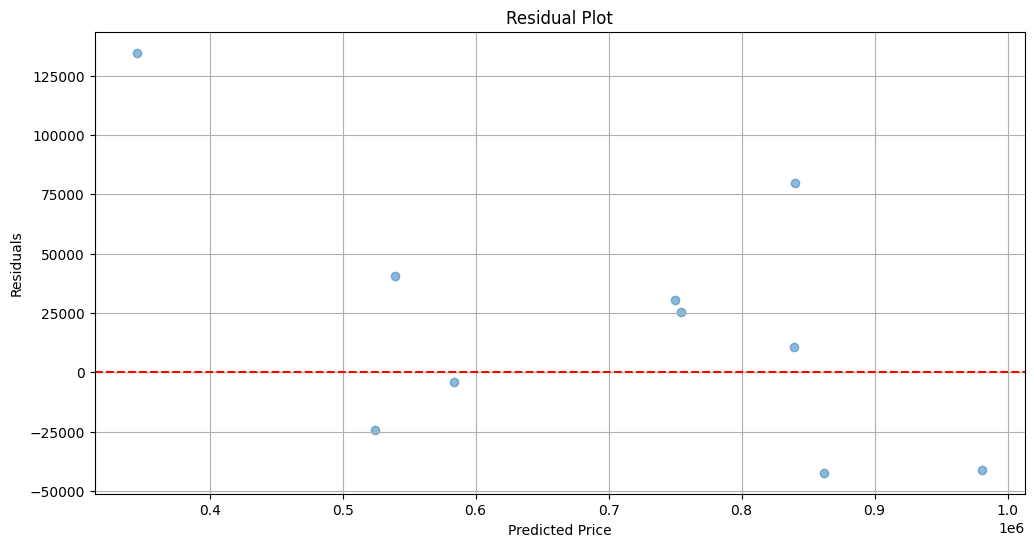

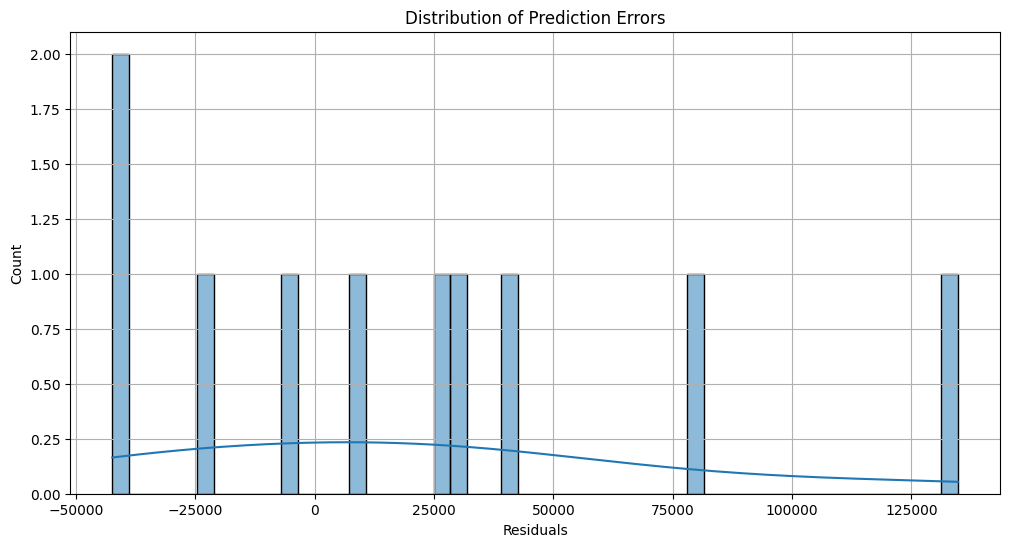

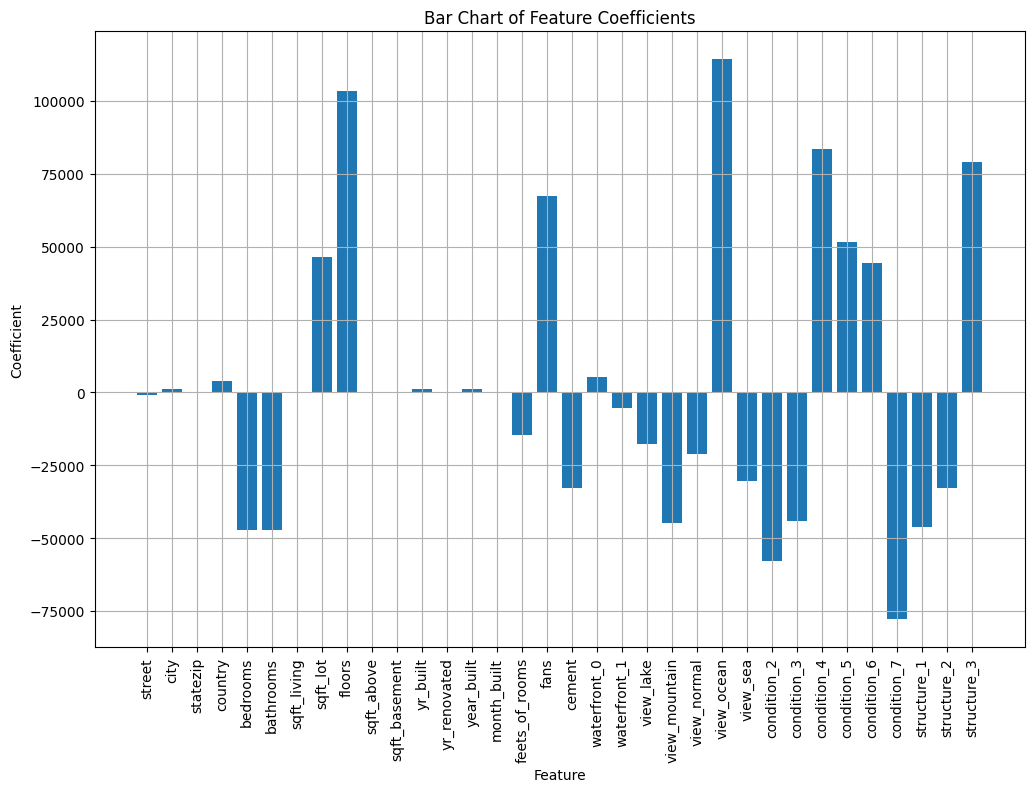

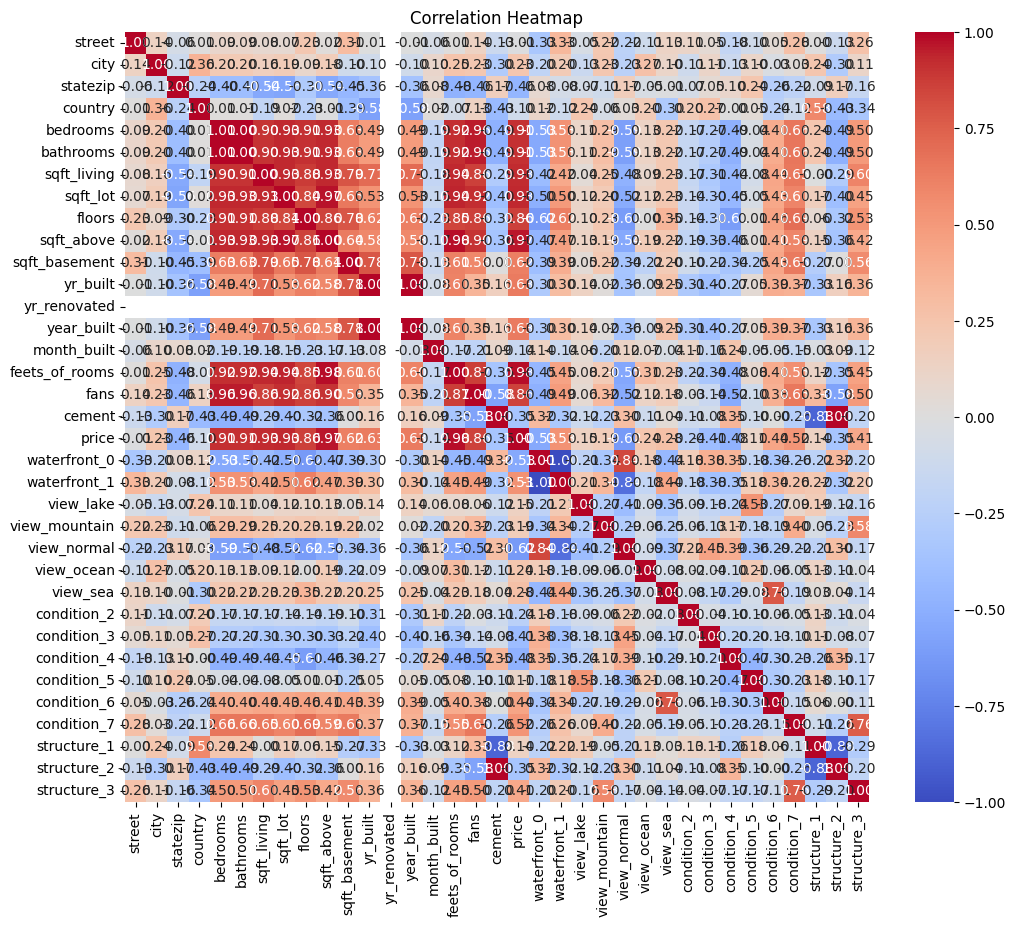

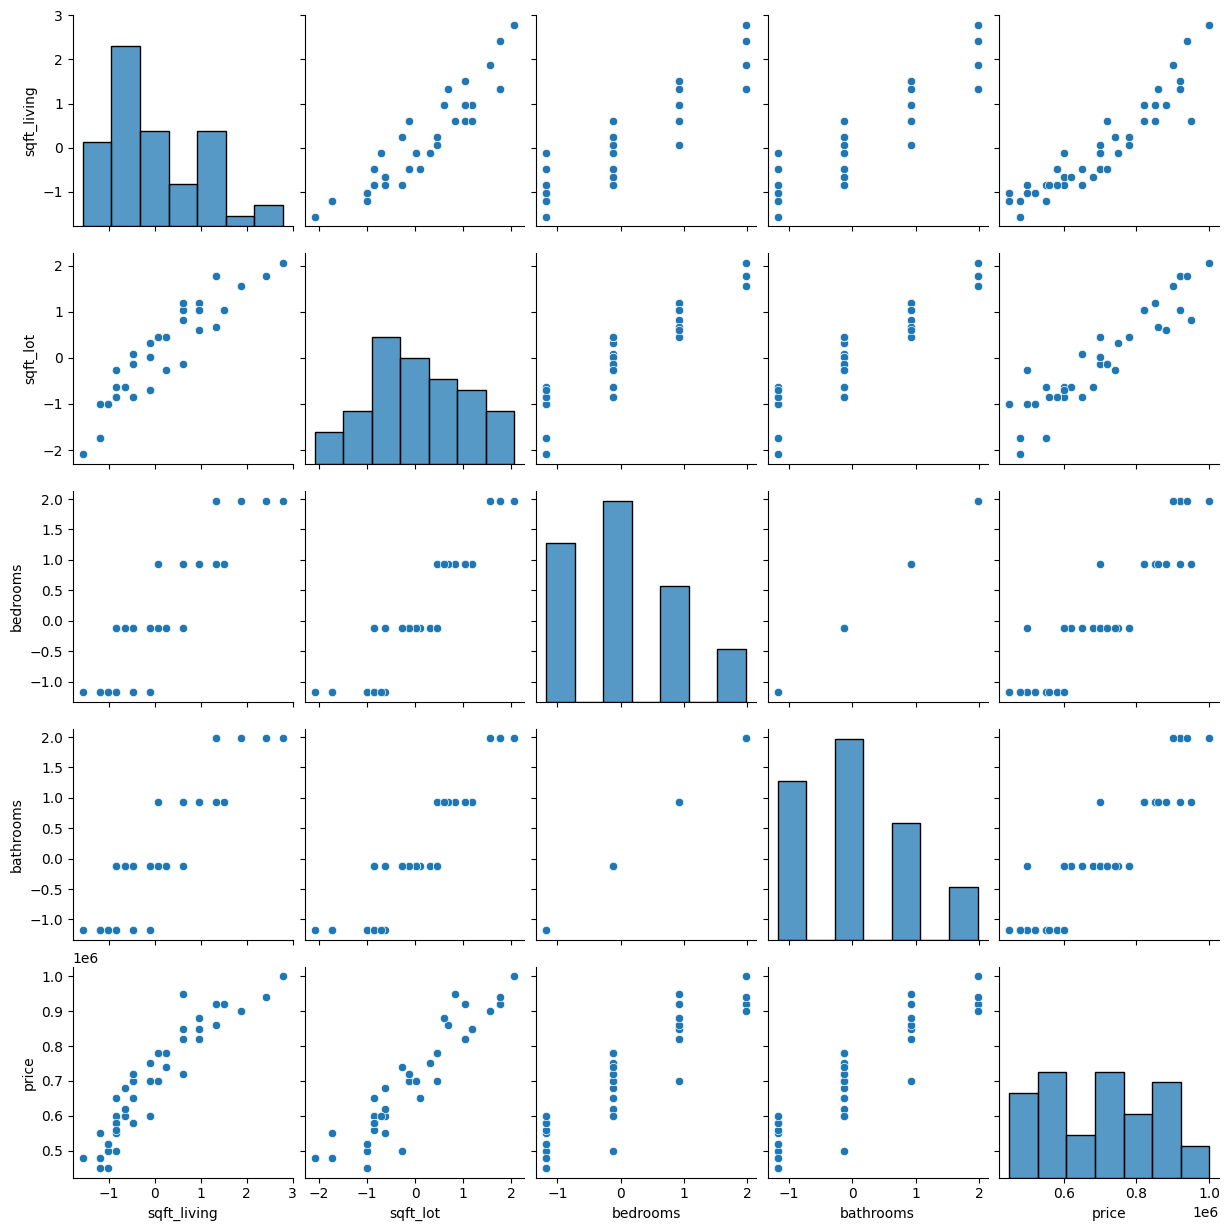

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/gretel_generated_table_2024-09-07-01-42-54.csv')

# Display the first few rows of the dataset
print("Sample of the Dataset:")
print(df.head())

# Display basic statistics and information about the dataset
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())

# Preprocess the data
# Convert categorical columns to numerical values using get_dummies
df = pd.get_dummies(df, columns=['waterfront', 'view', 'condition', 'structure'])

# Convert categorical columns to numerical values using LabelEncoder
le = LabelEncoder()
df['street'] = le.fit_transform(df['street'])
df['city'] = le.fit_transform(df['city'])
df['country'] = le.fit_transform(df['country'])

# Standardize numerical features
scaler = StandardScaler()
df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']])

# Split the data into training and testing sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'\nMean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# Visualizations

# Scatter plot of Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Scatter Plot of Predicted Prices vs. Actual Prices')
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Distribution of Errors
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# Feature Importance (Linear Regression Coefficients)
feature_importance = model.coef_
plt.figure(figsize=(12, 8))
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Bar Chart of Feature Coefficients')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot for Selected Features
subset_features = ['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'price']
subset_data = df[subset_features]
sns.pairplot(subset_data)
plt.show()
